# Programming for DataAnalysis Assignment

This notebook contains my submission for the project for the Programming for Data Analysis module, Winter 2022.

I have selected to analyse Airbnb listings in Dublin, Ireland. This analysis will focus on rating scores.

Problem Statement:

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose. Specifically, in this project you should:

* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
* Investigate the types of variables involved, their likely distributions, and their relationships with each other. * Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. The next section
gives an example project idea.

### Assumptions

We assume that all the data from data sources (Airbnb) is correct in terms of values, addresses and their corresponsing location.

Prices of properties are not affected by seasonality.

![Image2](https://www.independent.ie/news/b7e3b/41599548.ece/AUTOCROP/w1240/AIRBNB-IPOFEES%20SPARE)

### Step 1: Import required libraries

In [1]:
# NumPy for numerical operations
import numpy as np

# Pandas for data analysis
import pandas as pd

# Statistics for descriptive statistics
import statistics

# Matplotlib.pyplot for plotting
import matplotlib.pyplot as plt

# sklearn
import sklearn.neighbors as nei

from sklearn.neighbors import KNeighborsClassifier

# Dataset URL. Please note that this CSV file is compressed due to its size
url="http://data.insideairbnb.com/ireland/leinster/dublin/2022-09-11/data/listings.csv.gz"

# Importing the CSV file:
listingsDF = pd.read_csv(url, compression="gzip")

In [11]:
# As this is a zipped file, firstly I want to have a quick look and see the size of the data I am dealing with
listingsDF.shape

(7566, 75)

### Step 2: Explore and understand the data and data remediation<br>

In [17]:
listingsDF.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [42]:
# Having an initial look at the data

listingsDF.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,4.90,4.63,4.74,NaN,f,3,0,3,0,2.78
3,162809,https://www.airbnb.com/rooms/162809,20220911231053,2022-09-11,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,4.97,4.77,4.85,NaN,f,2,0,2,0,3.68
4,165828,https://www.airbnb.com/rooms/165828,20220911231053,2022-09-11,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,4.75,4.34,4.55,NaN,t,5,5,0,0,0.48


In [43]:
# Continuing to review the csv file

listingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7566 non-null   int64  
 1   listing_url                                   7566 non-null   object 
 2   scrape_id                                     7566 non-null   int64  
 3   last_scraped                                  7566 non-null   object 
 4   source                                        7566 non-null   object 
 5   name                                          7566 non-null   object 
 6   description                                   7411 non-null   object 
 7   neighborhood_overview                         4194 non-null   object 
 8   picture_url                                   7566 non-null   object 
 9   host_id                                       7566 non-null   i

In [ ]:
# Firstly, I want to get rid of any listings that haven't yet been reviewed
listingsDF.dropna(subset=['first_review'], inplace=True)
listingsDF.drop(columns=['first_review'], inplace= True)

In [10]:
# Now I will look for null values in the columns

listingsDF.isnull().mean()[listings.isnull().mean()>0].sort_values(ascending=False)

license                         1.000000
bathrooms                       1.000000
calendar_updated                1.000000
neighbourhood_group_cleansed    1.000000
host_about                      0.503624
host_response_time              0.458206
host_response_rate              0.458206
host_acceptance_rate            0.419391
neighbourhood                   0.406507
neighborhood_overview           0.406507
host_neighbourhood              0.306974
host_location                   0.162184
bedrooms                        0.026896
review_scores_value             0.020937
review_scores_location          0.020615
review_scores_checkin           0.020615
review_scores_accuracy          0.019971
review_scores_communication     0.019971
review_scores_cleanliness       0.019810
description                     0.017233
beds                            0.011435
bathrooms_text                  0.000483
dtype: float64

I have decided that I will be focusing on 5 columns in this project however I also want to keep my original listingsDF as it is in the event I want to do any further analysis on this data contained in it.

On that basis, I have decided to make a new version of the file and call it 'listingsDF2'.

While I have chosen to make a new file, I would have like to demonstate manipulating my dataset by cleaning it up and dropping irrelevant fields. I would have done this with the code: 

dropcols = ['Column_1', 'Column_2', etc]
listings.drop(columns=dropcols, inplace=True)

In [2]:
# From review of the data, I have decided I will only keep a small number of columns for my analysis and remove the rest.

# Columns that I am keeping: 'host_id', 'host_listings_count', 'reviews_per_month', 'reviews_score_rating', 'price'

listingsDF2 = listingsDF[['host_id','host_listings_count','reviews_per_month','review_scores_rating','price']].copy()

In [29]:
listingsDF2.shape

(7566, 5)

In [30]:
# I want to make sure my new 'listingsDF2' is showing correct info

listingsDF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_id               7566 non-null   int64  
 1   host_listings_count   7566 non-null   int64  
 2   reviews_per_month     6209 non-null   float64
 3   review_scores_rating  6209 non-null   float64
 4   price                 7566 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 295.7+ KB


In [32]:
# Continuing with reviewing the dataset, I want to check for nulls 
listingsDF2.isnull().mean()[listingsDF2.isnull().mean()>0].sort_values(ascending=False)

reviews_per_month       0.179355
review_scores_rating    0.179355
dtype: float64

In [33]:
# Using DataFrame.describe() method to get my statistical analysis for my listings dataframe

host_id_stats = listingsDF2.loc[:,'host_id']
host_id_stats.describe()

host_id_stats.describe()

count    7.566000e+03
mean     1.165346e+08
std      1.257774e+08
min      4.398400e+04
25%      2.500539e+07
50%      6.773535e+07
75%      1.624988e+08
max      4.787894e+08
Name: host_id, dtype: float64

In [37]:
# Using DataFrame.describe() method to get my statistical analysis for my listings dataframe

host_listings_count_stats = listingsDF2.loc[:,'host_listings_count']
host_listings_count_stats.describe()

host_listings_count_stats.describe()

count    7566.000000
mean       24.575601
std       202.623363
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      2157.000000
Name: host_listings_count, dtype: float64

In [36]:
# Using DataFrame.describe() method to get my statistical analysis for my listings dataframe

reviews_per_month_stats = listingsDF2.loc[:,'reviews_per_month']
reviews_per_month_stats.describe()

reviews_per_month_stats.describe()

count    6209.000000
mean        1.319006
std         1.988691
min         0.010000
25%         0.130000
50%         0.610000
75%         1.760000
max        44.720000
Name: reviews_per_month, dtype: float64

In [38]:
# Using DataFrame.describe() method to get my statistical analysis for my listings dataframe

review_scores_rating_stats = listingsDF2.loc[:,'review_scores_rating']
review_scores_rating_stats.describe()

review_scores_rating_stats.describe()

count    6209.000000
mean        4.603239
std         0.771441
min         0.000000
25%         4.560000
50%         4.810000
75%         5.000000
max         5.000000
Name: review_scores_rating, dtype: float64

In [39]:
# Using DataFrame.describe() method to get my statistical analysis for my listings dataframe

price_stats = listingsDF2.loc[:,'price']
price_stats.describe()

price_stats.describe()

count        7566
unique        547
top       $100.00
freq          235
Name: price, dtype: object

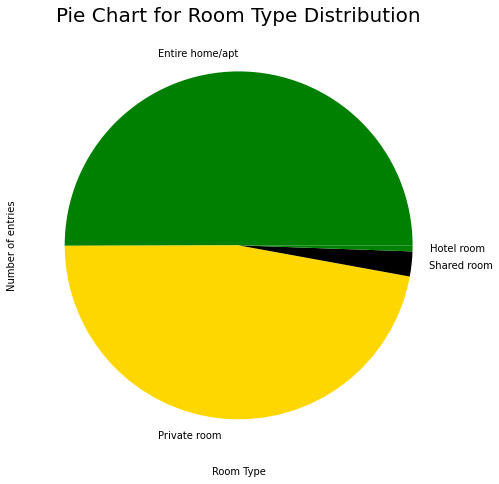

In [63]:
# Reverting back to listingsDF to illustrate some charts

# Pie chart of Room Type

# As I have not yet dropped the columns that I am not interested in, I have taken this opportunity to showcase ability to add graphs and charts
# I am aware this pie chart contains variables that I am not reviewing, it is being used to illustrate my ability to display charts and diagrams.

listingsDF['room_type'].value_counts().plot(kind = 'pie', colors=['green', 'gold', 'black'], figsize = (8, 8))
plt.title('Pie Chart for Room Type Distribution', fontsize = 20)
plt.xlabel('Room Type')
plt.ylabel('Number of entries')
plt.show()

Text(0.5, 1.0, 'Distribution of reviews in the top neighbourhoods')

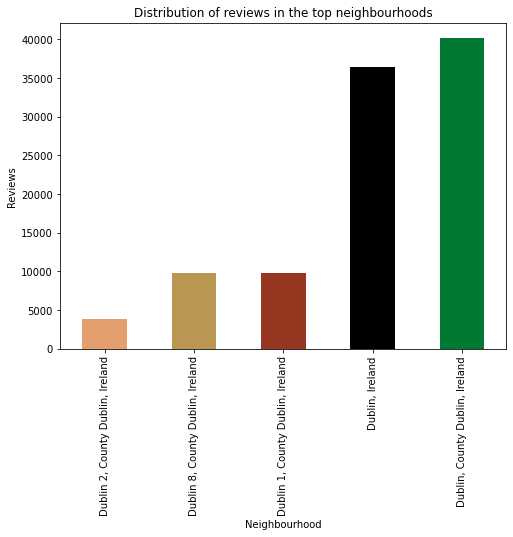

In [65]:
# Again, as per note above, this graph is for illustrative purposes, I thought it would be a nice opportunity to show different areas.

# Distribution of neighbourhoods, unfortunately the csv file did not have a detailed breakdown of locations in Dublin, Ireland,
# however for illustrative purposes, plot was added.

neighs = listingsDF.groupby('neighbourhood')
reviews = neighs['number_of_reviews'].sum().sort_values().tail(5)

reviews.plot(kind = 'bar', color=['#e59e6d', '#ba9653', '#963821', 'black', '#007a33'], figsize = (8, 6))
plt.xlabel('Neighbourhood')
plt.ylabel('Reviews')
plt.title('Distribution of reviews in the top neighbourhoods')

In [66]:
# As per above, showing my ability to analyse a dataset.

# Distribution of neighbourhoods, unfortunately the csv file did not have a detailed breakdown of locations in Dublin, Ireland,
# however for illustrative purposes, code was included.

res = listingsDF['neighbourhood'].value_counts()
# We want the most common neighbourhood, thus the head of the list
neig = res.keys().tolist()[0]
# And also the properties it has
n_props = res.tolist()[0]
print("The neighbourhood with the most listings is {} with {} properties".format(neig, n_props))

The neighbourhood with the most listings is Dublin, County Dublin, Ireland with 1127 properties


### Step 3: Synthesising the data and Random Samples

In [3]:
# Draw random samples from a normal (Gaussian) distribution of 'review_scores_rating'

# Parameters:
#               loc : mean (4.603239)
#               scale: standard deviation of the distribution (0.771441)
#               size: integer or tuple, outs shape (none).

rng = np.random.default_rng()
x = rng.random(6209)
print(x)

[0.76105281 0.08706881 0.67200487 ... 0.32221781 0.8719404  0.56074969]


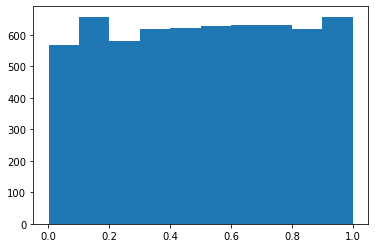

In [4]:
# Normal (Gaussian) distribution of 'review_scores_rating' continued

plt.hist(x)
plt.show()

In [5]:
# Normal (Gaussian) distribution of 'review_scores_rating' continued

y = np.random.normal(4.603239, 0.771441,6209)

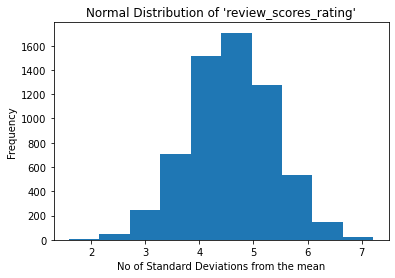

In [10]:
# Normal (Gaussian) distribution of 'review_scores_rating' continued

# plotting histogram with title and labels

plt.title("Normal Distribution of 'review_scores_rating'")
plt.xlabel("No of Standard Deviations from the mean")
plt.ylabel("Frequency")

plt.hist(y)
plt.show()

In [11]:
# numpy.random.seed: Adding this in for illustrative purposes

# setting the seed at 42,

rng = np.random.default_rng(seed=42)

In [12]:
# numpy.random.seed continued

# selecting a set of 15 random numbers

z = rng.random((5,3))

In [13]:
# numpy.random.seed continued

print(z)

[[0.77395605 0.43887844 0.85859792]
 [0.69736803 0.09417735 0.97562235]
 [0.7611397  0.78606431 0.12811363]
 [0.45038594 0.37079802 0.92676499]
 [0.64386512 0.82276161 0.4434142 ]]


Scikit-learn: A machine leanring library that provides almostall the machine leanring algorithms you might need. Schikit-learn is designed to be interpolated into NumPy and SciPy.

In [3]:
# Step 1 - Import libraries
from sklearn.datasets import make_classification
import pandas as pd

# Create simulated data
features, output = make_classification(n_samples = 50,
                                       n_features = 5,
                                       n_informative = 5,
                                       n_redundant = 0,
                                       n_classes = 3,
                                       weights = [1, 1, 1])

print("Feature Matrix: ");
# renaming my selected variables with a 'V2' added to name in order to distinguish between my original data and new data
print(pd.DataFrame(features, columns=["host_id_v2", "host_listings_count_v2", "reviews_per_month_v2", "review_score_rating_v2", "price_v2"]).head())

print()
print("Target Class: ");

Feature Matrix: 
   host_id_v2  host_listings_count_v2  reviews_per_month_v2  \
0   -1.904755                0.220892             -0.674106   
1   -0.624866                1.658269              0.865887   
2   -0.220107               -1.040238             -0.093203   
3    0.951059               -0.371344              1.231066   
4   -1.802986                0.414018             -1.886288   

   review_score_rating_v2  price_v2  
0               -0.243172  0.209275  
1               -1.818129 -0.311116  
2                0.591169  1.322630  
3                1.438163  1.260309  
4               -1.063846  1.374012  

Target Class: 


### Scikit learn: Nearest neighbor

Please note that in order to run through this code, I had to select different variables to review as the selected variables I have chosen were not all the appropriate data types. 

#### Inputs and Outputs

In [17]:
# removed 'price', 'review_scores_rating'

inputs = listingsDF[['host_id', 'latitude', 'longitude']]
outputs = listingsDF['id']

#### Classifier

In [18]:
# from sklearn.neighbors import KNeighborsClassifier - this has been imported at top of page, also leaving here to demonstrate its use.

knn = nei.KNeighborsClassifier(n_neighbors=4)
#import sklearn.neighbors as nei

#### Fit

In [19]:
knn.fit(inputs, outputs)

KNeighborsClassifier(n_neighbors=4)

#### Predict

In [20]:
listingsDF.loc[0]

id                                                                           44077
listing_url                                     https://www.airbnb.com/rooms/44077
scrape_id                                                           20220911231053
last_scraped                                                            2022-09-12
source                                                                 city scrape
                                                               ...                
calculated_host_listings_count                                                   2
calculated_host_listings_count_entire_homes                                      0
calculated_host_listings_count_private_rooms                                     2
calculated_host_listings_count_shared_rooms                                      0
reviews_per_month                                                             1.85
Name: 0, Length: 75, dtype: object

In [66]:
# preditings the 'id'

knn.predict([[0.352965,0.872357,1.343674]])

array([2635493], dtype=int64)

### Conclusion

![Image](https://qtxasset.com/cdn-cgi/image/w=850,h=478,f=auto,fit=crop,g=0.5x0.5/https://qtxasset.com/quartz/qcloud1/media/image/hotelmanagement/1546632060/Airbnb%20Logo.png/Airbnb%20Logo.png?VersionId=ThlQLEp0zFaHTe_93YSLwNNOHeweU0sd)